# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. This project is just meant to practice visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data


### The Imports


In [1]:
import pandas as pd
from pandas_datareader import data, wb
import pandas_datareader.data as web
import numpy as np
import datetime
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

**Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.


In [2]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

In [3]:
BAC = web.DataReader('BAC','yahoo',start,end)
C = web.DataReader('C','yahoo',start,end)
GS = web.DataReader('GS','yahoo',start,end)
JPM = web.DataReader('JPM','yahoo',start,end)
MS = web.DataReader('MS','yahoo',start,end)
WFC = web.DataReader('WFC','yahoo',start,end)

**Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [4]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

**Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [5]:
bank_stocks = pd.concat(objs=[BAC,C,GS, JPM, MS, WFC], keys=tickers, axis=1)

**Set the column name levels (this is filled out for you):**

In [6]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

**Check the head of the bank_stocks dataframe.**

In [7]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   34.106030  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   33.743820  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   33.787281  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   33.736565  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   33.758293  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  36.114265  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  36.139030  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  36.238136  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  36.275295  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  36.659290  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.444874  
2006-01-04   31.799999  31.530001  10870000.0  20.207731  
2006-01-05   31.500000  31.495001  10158000.0  20.185310  
2006-01-06   31.580000  31.680000   8403800.0  20.303871  
2006-01-09   31.674999  31.674999   5619600.0  20.300667  

[5 rows x 36 columns]

# Exploratory Data Analysis

Let's explore the data a bit!

**What is the max Close price for each bank's stock throughout the time period?**

In [8]:
for t in tickers:
    print(t,bank_stocks[t]['Close'].max())

BAC 54.900001525878906
C 564.0999755859375
GS 247.9199981689453
JPM 70.08000183105469
MS 89.30000305175781
WFC 58.52000045776367


In [9]:
bank_stocks.xs(key ='Close', axis=1, level = 'Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

**Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [10]:
returns = pd.DataFrame()

We can use pandas pct_change() method on the Close column to create a column representing this return value. 

**Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [11]:
for t in tickers:
    returns[t+' Return'] = bank_stocks[t]['Close'].pct_change()

In [12]:
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


**Create a pairplot using seaborn of the returns dataframe.**

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

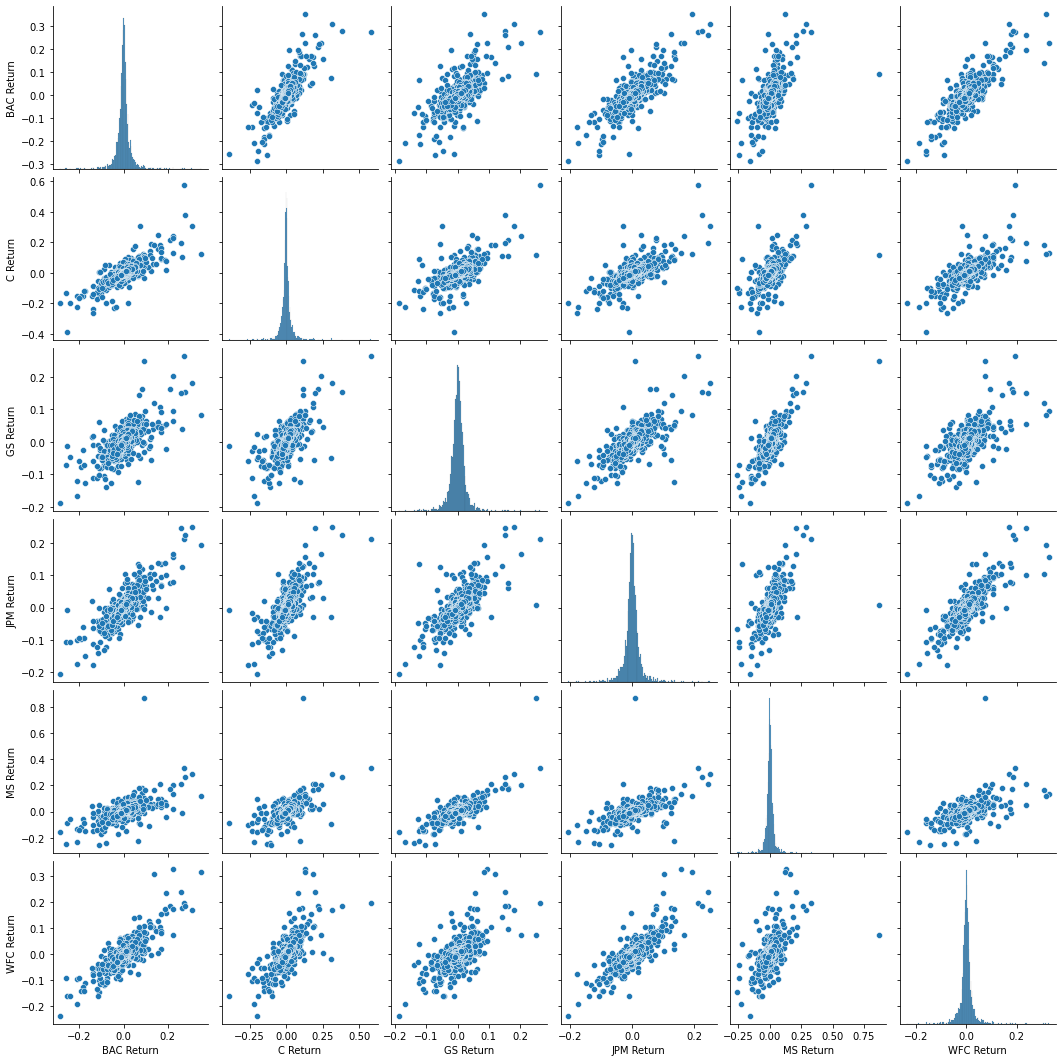

In [14]:
sns.pairplot(returns[1:])

**Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [15]:
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


In [16]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [17]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

*MorganStanley stocks have the largest (marginally) std, so the risk is largest for Citygroup*

In [18]:
returns.loc['2015-01-01':'2015-12-31'].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

**Create a histogram of the 2015 returns for Morgan Stanley**

(array([ 1.,  1.,  0.,  1.,  0.,  0.,  0.,  2.,  1.,  3.,  1.,  4.,  1.,
         1.,  5.,  4.,  7.,  9., 10., 13., 20., 11., 12., 21., 17., 15.,
        13., 10., 14., 16., 13.,  6.,  3.,  3.,  3.,  2.,  3.,  1.,  1.,
         1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  1.]),
 array([-0.0570009 , -0.05463628, -0.05227165, -0.04990703, -0.0475424 ,
        -0.04517778, -0.04281316, -0.04044853, -0.03808391, -0.03571928,
        -0.03335466, -0.03099003, -0.02862541, -0.02626079, -0.02389616,
        -0.02153154, -0.01916691, -0.01680229, -0.01443766, -0.01207304,
        -0.00970842, -0.00734379, -0.00497917, -0.00261454, -0.00024992,
         0.0021147 ,  0.00447933,  0.00684395,  0.00920858,  0.0115732 ,
         0.01393783,  0.01630245,  0.01866707,  0.0210317 ,  0.02339632,
         0.02576095,  0.02812557,  0.0304902 ,  0.03285482,  0.03521944,
         0.03758407,  0.03994869,  0.04231332,  0.04467794,  0.04704256,
         0.04940719,  0.05177181,  0.05413644,  0.05650106,

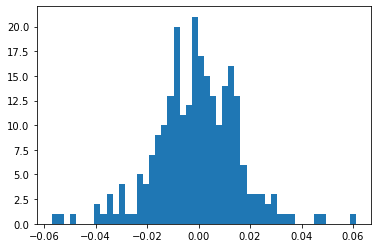

In [19]:
plt.hist(x=returns.loc['2015-01-01':'2015-12-31']['MS Return'], bins =50 )

**Create a histogram of the 2008 returns for CitiGroup**

(array([ 1.,  1.,  1.,  1.,  1.,  0.,  1.,  2.,  2.,  4.,  2., 11., 24.,
        22., 40., 39., 39., 24., 10.,  5.,  3.,  5.,  6.,  1.,  2.,  1.,
         3.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-0.26406252, -0.24721629, -0.23037005, -0.21352381, -0.19667758,
        -0.17983134, -0.1629851 , -0.14613887, -0.12929263, -0.11244639,
        -0.09560016, -0.07875392, -0.06190768, -0.04506145, -0.02821521,
        -0.01136898,  0.00547726,  0.0223235 ,  0.03916973,  0.05601597,
         0.07286221,  0.08970844,  0.10655468,  0.12340092,  0.14024715,
         0.15709339,  0.17393963,  0.19078586,  0.2076321 ,  0.22447834,
         0.24132457,  0.25817081,  0.27501705,  0.29186328,  0.30870952,
         0.32555576,  0.34240199,  0.35924823,  0.37609447,  0.3929407 ,
         0.40978694,  0.42663318,  0.44347941,  0.46032565,  0.47717189,
         0.49401812,  0.51086436,  0.5277106 ,  0.54455683,

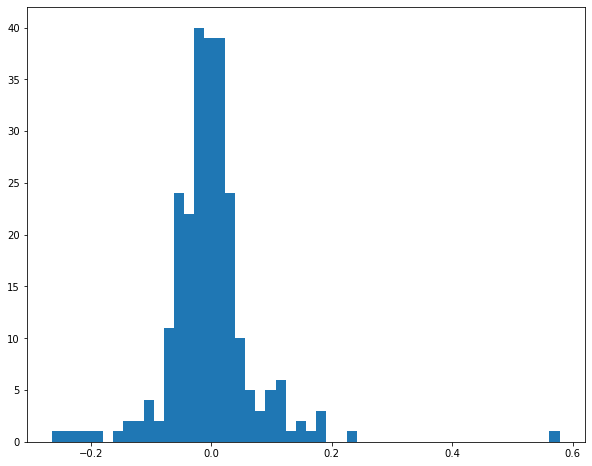

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.hist(x=returns.loc['2008-01-01':'2008-12-31']['C Return'], bins =50 )

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

**Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

In [22]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   34.106030  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   33.743820  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   33.787281  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   33.736565  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   33.758293  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  36.114265  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  36.139030  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  36.238136  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  36.275295  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  36.659290  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.444874  
2006-01-04   31.799999  31.530001  10870000.0  20.207731  
2006-01-05   31.500000  31.495001  10158000.0  20.185310  
2006-01-06   31.580000  31.680000   8403800.0  20.303871  
2006-01-09   31.674999  31.674999   5619600.0  20.300667  

[5 rows x 36 columns]

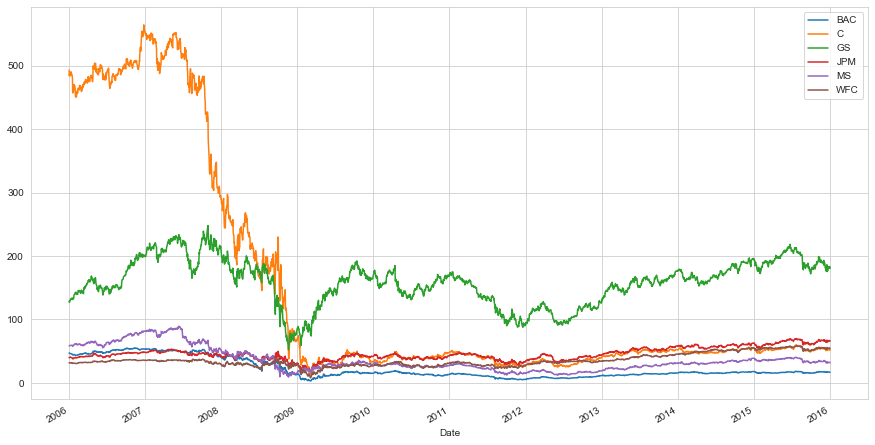

In [23]:
for t in tickers:
    bank_stocks[t]['Close'].plot(label=t, figsize=(15,8))
plt.legend()

<AxesSubplot:xlabel='Date'>

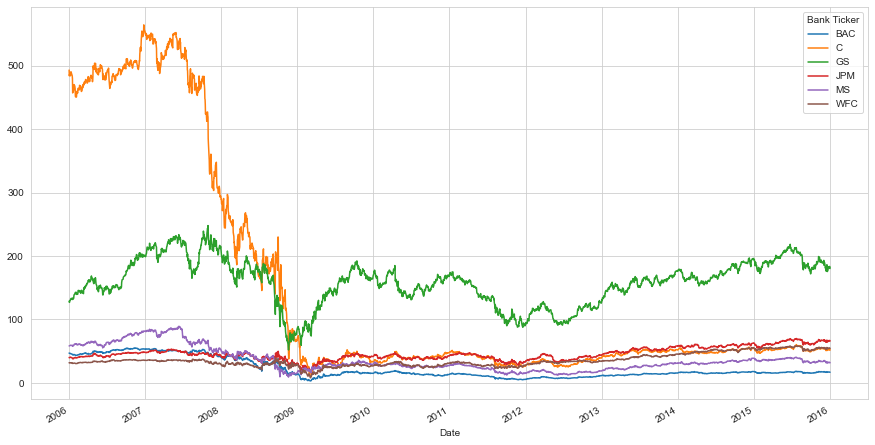

In [24]:
bank_stocks.xs(key ='Close', axis=1, level = 'Stock Info').plot(figsize=(15,8))

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

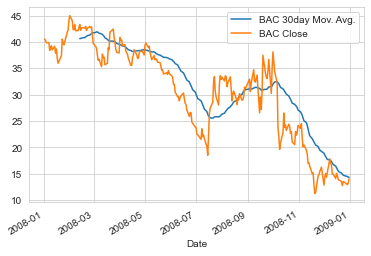

In [25]:
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='BAC 30day Mov. Avg.')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label = 'BAC Close')
plt.legend()

** Create a heatmap of the correlation between the stocks Close Price.**

In [26]:
bank_stocks.xs(key= 'Close', axis=1, level = 'Stock Info').corr()

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Bank Ticker,,,,,,
BAC,1.000000,0.971516,0.550898,0.103874,0.944218,0.008542
C,0.971516,1.000000,0.434123,0.003515,0.933609,-0.068536
GS,0.550898,0.434123,1.000000,0.685286,0.683792,0.499897
JPM,0.103874,0.003515,0.685286,1.000000,0.250427,0.940269
MS,0.944218,0.933609,0.683792,0.250427,1.000000,0.131835
WFC,0.008542,-0.068536,0.499897,0.940269,0.131835,1.000000


<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

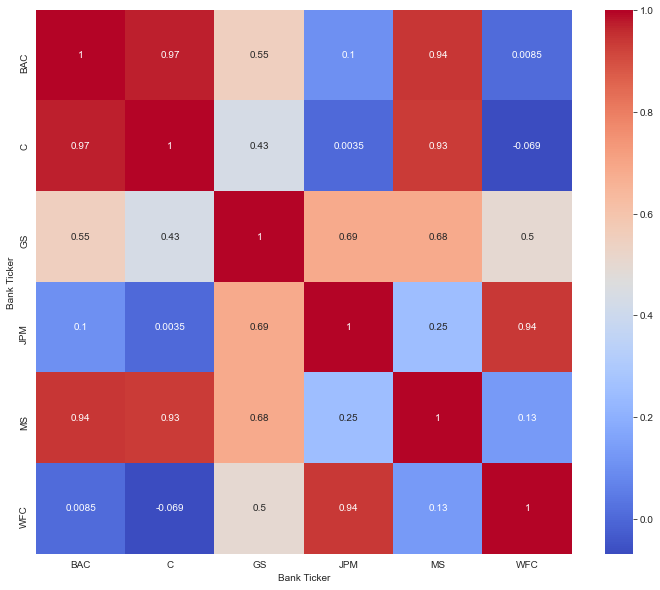

In [27]:
plt.figure(figsize=(12,10))
sns.heatmap(data= bank_stocks.xs(key= 'Close', axis=1, level = 'Stock Info').corr(), cmap='coolwarm',annot = True)

** Optional: Use seaborn's clustermap to cluster the correlations together:**

<Figure size 864x720 with 0 Axes>

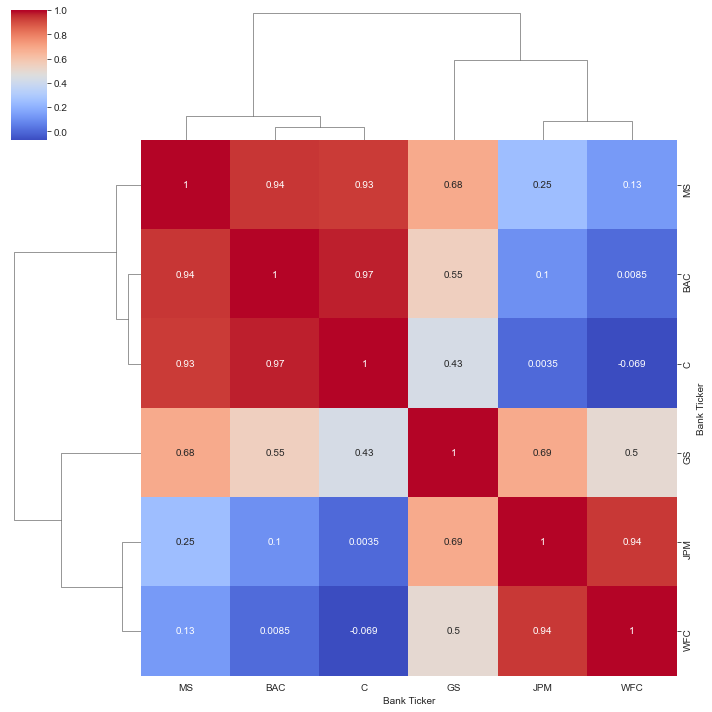

In [28]:
plt.figure(figsize=(12,10))
sns.clustermap(data= bank_stocks.xs(key= 'Close', axis=1, level = 'Stock Info').corr(), cmap='coolwarm',annot = True)